# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: 11/30/2022
* Student Name: RJ Cubarrubia
* Student Net ID: rcc7u
* This URL: https://github.com/rjcubarrubia/montecarlosim/blob/main/final-project-submission.ipynb
* GitHub Repo URL: https://github.com/rjcubarrubia/montecarlosim

Some text and code has been cut off due to .pdf cell space restrictions.  
For original formatting and text, please visit:   
https://github.com/rjcubarrubia/montecarlosim/blob/main/final-project-submission.ipynb

# The Monte Carlo Module

In [59]:
import numpy as np
import pandas as pd


class Die():
    '''
    Creates die object. 
    Contains the methods:
        __init__
        change_weight
        roll
        show
    '''
    
    
    def __init__(self, faces):
        '''
        Accepts an array of faces as an argument. Faces must be unique. 
        Initializes the weights for the faces as 1.0 as default. 
        Weights can be changed later with .change_weight method. 
        Creates a private data frame of faces and weights.
        '''
        
        flag = len(set(faces)) == len(faces)
        if flag == 0:
            #print("Each face must be unique.")
            raise ValueError("Each face must be unique.")
        
        weights = np.ones(len(faces))
                      
        self._faces_and_weights_df = pd.DataFrame({'Faces': faces, 'Weights': weights})
        
        
    def change_weight(self, face, weight):
        '''
        Accepts a face and a weight argument. Face argument is the face value to be changed and weight argument is the new weight.
        Checks to see if the face passed is indeed in the array of weights.
        Converts weight to float. 
        Changes the weight of the die that corresponds with the face that is passed.
        '''
        
        weight = float(weight)
        
        if face not in list(self._faces_and_weights_df['Faces']):
            #print("Face is not in the initialized die.")
            raise ValueError("Face is not in the created die.")
            
        face_row_index = list(self._faces_and_weights_df.index[self._faces_and_weights_df['Faces'] == face])[0]
        self._faces_and_weights_df.loc[face_row_index, 'Weights'] = weight
        
        
    def roll(self, rolls = 1):
        '''
        Rolls the die. Accepts rolls as an argument. Rolls defaults to 1. 
        '''
        
        rolled_faces_and_weights_df = (self._faces_and_weights_df.sample(n = rolls, replace = True, weights = 'Weights').
                                       reset_index(drop = True))
        
        return list(rolled_faces_and_weights_df['Faces'])
        
    def show(self):
        '''
        Returns the faces and weights of the initialized die.
        '''
        
        return self._faces_and_weights_df
        

class Game():
    '''
    Creates a game of rolling one or more die of the same kind one or more times.
    Dice have the same number of sides and set of faces but each die can have its own weights.
    Contains no public attributes. 
    show() method returns data frame can be made narrow or wide.
    Contains the methods:
        __init__
        play
        show
    '''
    
    def __init__(self, dice_list):
        '''
        Initializes game object. 
        Accepts a list of similar die objects as an argument. Dice have already been instantiated with Die class.
        '''
        
        self.dice_list = dice_list
        
        
    def play(self, rolls):
        '''
        Accepts number of rolls as an argument. 
        Creates private data frame of rolls as observations (rows) and dice as features (columns).
        Elements of dataframe are [roll, die face result of roll].
        '''
        
        self._rolls_and_dice_df = pd.DataFrame()
        self._rolls_and_dice_df.index.rename("Roll Number", inplace = True)
        
        for die in range(0, len(self.dice_list)):
            self._rolls_and_dice_df[die] = self.dice_list[die].roll(rolls)
            
    
    def show(self, wide_or_narrow = 'wide'):
        '''
        Accepts "wide" or "narrow" as arguments for the type of data frame desired. 
        Argument defaults to "wide" data frame.
        Returns the data frame of rolls and faces. 
        '''
        
        if wide_or_narrow == 'wide':
            return self._rolls_and_dice_df
        
        elif wide_or_narrow == 'narrow':
            rolls_and_dice_df_narrow = self._rolls_and_dice_df.stack().to_frame('Faces')
            rolls_and_dice_df_narrow.index.rename(["Roll Number", "Dice"], inplace = True)
            return rolls_and_dice_df_narrow
        
        else:
            #print("Argument must be either "narrow" or "wide" for the type of data frame desired.")
            raise ValueError("Argument must be either \"narrow\" or \"wide\" for the type of data frame desired.")
            

class Analyzer():
    '''
    Analyzes the dice game after the game is played.
    Contains the following public attributes:
    face_counts_per_roll_df
        jackpot_df
        jackpot_count
        permutation_count
        combo_df
        combo_count
    Contains the following methods:
        __init__
        face_counts_per_roll
        jackpot
        permutations
        combo  
    '''
        
    
    def __init__(self, game):
        '''
        Initializes analyzer object.
        Accepts a game object as an argument.
        '''
        
        self._game = game
            
        
    def face_counts_per_roll(self):
        '''
        Creates data frame containing the amount of times a face appears in each roll.
        This data frame is the public attribute face_counts_per_roll_df
        Rows are rolls; columns are faces in the dice.
        '''
        
        game_df_narrow = self._game.show("narrow")
        self.face_counts_per_roll_df = (game_df_narrow.groupby("Roll Number").value_counts().
                                        to_frame()[0].unstack().fillna(0).astype(int))
        
        
    def jackpot(self):
        '''
        Counts the amount of rolls that resulted in all faces being the same.
        Creates data frame that tracks each jackpot. with rolls as rows and faces as columns.
        This data frame is the public attribute jackpot_df
        Returns the count of jackpots rolled.
        Count of jackpots is also the public attribute jackpot_count
        '''
        
        game_df = self._game.show()
        self.jackpot_df = game_df[game_df.nunique(1) == 1]
        
        self.jackpot_count = int(len(self.jackpot_df))
        
        return self.jackpot_count
        print("There was/were " + str(self.jackpot_count) + " jackpot(s).")
    
    
    def combo(self):
        '''
        Creates data frame with multi-columned index. 
        Rows are combinations and column is how many times that combination appeared.
        This data frame is the public attribute combo_df
        Creates a count of how many unique combinations were rolled. 
        This count is the public attribute combo_count
        '''
        
        game_df = self._game.show()
        
        self.combo_df = game_df.apply(lambda x: x.sort_values().squeeze(), axis=1).value_counts().to_frame('count')
        self.combo_count = len(self.combo_df)    
        
        
    def permutations(self):
        '''
        Counts the amount of permuations that appeared.
        This count is the public attribute permutation_count
        '''
        
        self.permutation_count = self._game.show().value_counts(ascending = False).reset_index(name = 'count')
        


# Test Module

In [3]:
#import numpy as np
#import pandas as pd
#from montecarlosim import *
import unittest

class MonteCarloSimTestSuite(unittest.TestCase):
    '''
    Unit Test suite for MonteCarloSim package.
    Tests Die class, Game class and Analyzer class.
    '''
    
    def test_1_change_weight(self):
        '''
        Tests change_weight method in Die class.
        '''
        faces1 = [1, 2]
        die1 = Die(faces1)
        
        die1.change_weight(2, 3)
        
        die1_df = die1._faces_and_weights_df
        testdie1_df = pd.DataFrame({'Faces': [1, 2], 'Weights': [1, 3]})
        
        die1_df_testcell = die1_df.loc[1, "Weights"]
        testdie1_df_testcell = testdie1_df.loc[1, "Weights"]
        
        self.assertEqual(die1_df_testcell, testdie1_df_testcell)
        
                                       
    def test_2_roll(self):
        '''
        Tests roll method in Die class.
        '''
        die2 = Die([1, 2])
        
        test2_length = 5
                                       
        self.assertEqual(len(die2.roll(5)), test2_length)
    
                                       
    def test_3_show(self):
        '''
        Tests show method in Die class.
        '''
        die3 = Die([1, 2])
        
        die3_shape = die3.show().shape
        test_shape = (2, 2)
        
        self.assertEqual(die3_shape, test_shape)
                                       
                                       
    def test_4_play(self):
        '''
        Tests play method in Game class.
        '''                              
        sixsided = [1, 2, 3, 4, 5, 6]

        testdie1 = Die(sixsided)
        testdie2 = Die(sixsided)
        testdie3 = Die(sixsided)
        testdie4 = Die(sixsided)

        testdielist = [testdie1, testdie2, testdie3, testdie4]

        testgame = Game(testdielist)
        testgame.play(5)
        testgame_df = testgame._rolls_and_dice_df

        testgame_df_shape = testgame_df.shape
        test_shape = (5, 4)
                                       
        self.assertEqual(testgame_df_shape, test_shape)
                                    
                                       
    def test_5_show(self):
        '''
        Tests show method in Game class.
        '''
        sixsided = [1, 2, 3, 4, 5, 6]

        testdie1 = Die(sixsided)
        testdie2 = Die(sixsided)
        testdie3 = Die(sixsided)
        testdie4 = Die(sixsided)

        testdielist = [testdie1, testdie2, testdie3, testdie4]

        testgame2 = Game(testdielist)
        testgame2.play(5) 
        testgame2_df = testgame2.show()
                                       
        testgame2_df_shape = testgame2_df.shape
        test_shape2 = (5, 4)
                                       
        self.assertEqual(testgame2_df_shape, test_shape2)
                                       
    
    def test_6_face_counts_per_roll(self):
        '''
        Tests face_counts_per_roll method in Analyzer class.
        '''
        twosided = [1, 2]

        testcoin1 = Die(twosided)
        testcoinlist = [testcoin1]
        testgame3 = Game(testcoinlist)
        testgame3.play(1)

        testgame3analyzer = Analyzer(testgame3)
        testgame3analyzer.face_counts_per_roll()
                                       
        analyzer_value = testgame3analyzer.face_counts_per_roll_df.iloc[0, 0]
        test_value = 1
                                       
        self.assertEqual(analyzer_value, test_value)
                                       
                                       
    def test_7_jackpot(self):
        '''
        Tests jackpot method in Analyzer class.
        '''
        twosided = [1, 2]
                                       
        testcoin1 = Die(twosided)
        testcoin2 = Die(twosided)
        testcoin3 = Die(twosided)
                                       
        testcoin1.change_weight(2, 0)
        testcoin2.change_weight(2, 0)
        testcoin3.change_weight(2, 0)
                                       
        testcoinlist = [testcoin1, testcoin2, testcoin3]
        testgame4 = Game(testcoinlist)
        testgame4.play(5)
                                       
        testgame4analyzer = Analyzer(testgame4)
                                       
        test4jackpots = testgame4analyzer.jackpot()
        testvalue = 5
                                       
        self.assertEqual(test4jackpots, testvalue)
                                       
                                       
    def test_8_combo(self):
        '''
        Tests combo method in Analyzer class.
        '''
        twosided = [1, 2]
                                       
        testcoin1 = Die(twosided)
        testcoin2 = Die(twosided)
        testcoin3 = Die(twosided)
                                       
        testcoin1.change_weight(2, 0)
        testcoin2.change_weight(2, 0)
        testcoin3.change_weight(2, 0)
                                       
        testcoinlist = [testcoin1, testcoin2, testcoin3]
        testgame = Game(testcoinlist)
        testgame.play(5)
                                       
        testgameanalyzer = Analyzer(testgame)
        testgameanalyzer.combo()
        
        testgamecombocount = testgameanalyzer.combo_count
        testvalue = 1
        
        self.assertEqual(testgamecombocount, testvalue)
        
                                                                              
    def test_9_permutations(self):
        '''
        Tests permutations method in Analyzer class.
        '''
        twosided = [1, 2]
                                       
        testcoin1 = Die(twosided)
        testcoin2 = Die(twosided)
        testcoin3 = Die(twosided)
                                       
        testcoin1.change_weight(2, 0)
        testcoin2.change_weight(2, 0)
        testcoin3.change_weight(2, 0)
                                       
        testcoinlist = [testcoin1, testcoin2, testcoin3]
        testgame5 = Game(testcoinlist)
        testgame5.play(5)
                                       
        testgame5analyzer = Analyzer(testgame5)
        testgame5analyzer.permutations()
                                       
        testgame5permutations = len(testgame5analyzer.permutation_count)
        testvalue = 1
                                       
        self.assertEqual(testgame5permutations, testvalue)
                                       
                                       
#if __name__ == '__main__':

    #unittest.main(verbosity = 3)
                                       


# Test Results

In [6]:
!python montecarlosim/montecarlo_tests.py

test_1_change_weight (__main__.MonteCarloSimTestSuite)
Tests change_weight method in Die class. ... ok
test_2_roll (__main__.MonteCarloSimTestSuite)
Tests roll method in Die class. ... ok
test_3_show (__main__.MonteCarloSimTestSuite)
Tests show method in Die class. ... ok
test_4_play (__main__.MonteCarloSimTestSuite)
Tests play method in Game class. ... ok
test_5_show (__main__.MonteCarloSimTestSuite)
Tests show method in Game class. ... ok
test_6_face_counts_per_roll (__main__.MonteCarloSimTestSuite)
Tests face_counts_per_roll method in Analyzer class. ... ok
test_7_jackpot (__main__.MonteCarloSimTestSuite)
Tests jackpot method in Analyzer class. ... ok
test_8_combo (__main__.MonteCarloSimTestSuite)
Tests combo method in Analyzer class. ... ok
test_9_permutations (__main__.MonteCarloSimTestSuite)
Tests permutations method in Analyzer class. ... ok

----------------------------------------------------------------------
Ran 9 tests in 0.018s

OK


# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

## Scenario 1

In [7]:
#import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
#from montecarlosim.montecarlosim import *

In [9]:
# SCENARIO 1: 2-HEADED COIN

two_sided = ["H", "T"]

fair_coin1 = Die(two_sided)
fair_coin2 = Die(two_sided)
fair_coin3 = Die(two_sided)

unfair_coin1 = Die(two_sided)
unfair_coin2 = Die(two_sided)

unfair_coin1.change_weight("T", 5)
unfair_coin2.change_weight("T", 5)

In [10]:
fair_coin_list = [fair_coin1, fair_coin2, fair_coin3]
unfair_coin_list = [unfair_coin1, unfair_coin2, fair_coin1]

fair_coin_game = Game(fair_coin_list)
unfair_coin_game = Game(unfair_coin_list)

In [11]:
fair_coin_game.play(1000)
unfair_coin_game.play(1000)

In [12]:
fair_coin_game_analyzer = Analyzer(fair_coin_game)
unfair_coin_game_analyzer = Analyzer(unfair_coin_game)

In [13]:
fair_coin_game_jackpot_frequency = fair_coin_game_analyzer.jackpot() / 1000
fair_coin_game_jackpot_frequency

0.261

In [14]:
unfair_coin_game_jackpot_frequency = unfair_coin_game_analyzer.jackpot() / 1000
unfair_coin_game_jackpot_frequency

0.371

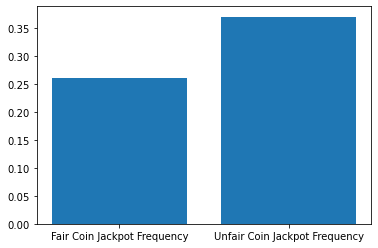

In [15]:
plt.bar(["Fair Coin Jackpot Frequency", "Unfair Coin Jackpot Frequency"], 
        [fair_coin_game_jackpot_frequency, unfair_coin_game_jackpot_frequency])
plt.show()

## Scenario 2

In [16]:
# SCENARIO 2: 6-SIDED DIE

six_sided = [1, 2, 3, 4, 5, 6]

fair_die1 = Die(six_sided)
fair_die2 = Die(six_sided)
fair_die3 = Die(six_sided)
fair_die4 = Die(six_sided)
fair_die5 = Die(six_sided)

unfair_die1a = Die(six_sided)
unfair_die1b = Die(six_sided)
unfair_die2a = Die(six_sided)

unfair_die1a.change_weight(6, 5)
unfair_die1b.change_weight(6, 5)

unfair_die2a.change_weight(1, 5)

In [17]:
fair_dice_list = [fair_die1, fair_die2, fair_die3, fair_die4, fair_die5]
unfair_dice_list = [unfair_die1a, unfair_die1b, unfair_die2a, 
                    fair_die1, fair_die2]

fair_dice_game = Game(fair_dice_list)
unfair_dice_game = Game(unfair_dice_list)

In [18]:
fair_dice_game.play(10000)
unfair_dice_game.play(10000)

In [19]:
fair_dice_game_analyzer = Analyzer(fair_dice_game)
unfair_dice_game_analyzer = Analyzer(unfair_dice_game)

In [20]:
fair_dice_game_jackpot_frequency = fair_dice_game_analyzer.jackpot() / 10000
fair_dice_game_jackpot_frequency

0.0006

In [21]:
unfair_dice_game_jackpot_frequency = unfair_dice_game_analyzer.jackpot() / 10000
unfair_dice_game_jackpot_frequency

0.0014

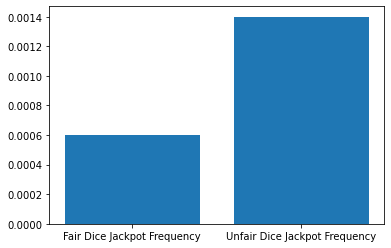

In [22]:
plt.bar(["Fair Dice Jackpot Frequency", "Unfair Dice Jackpot Frequency"], 
        [fair_dice_game_jackpot_frequency, unfair_dice_game_jackpot_frequency])
plt.show()

In [23]:
fair_dice_game_analyzer.combo()
unfair_dice_game_analyzer.combo()

In [24]:
fair_combos = fair_dice_game_analyzer.combo_df
unfair_combos = unfair_dice_game_analyzer.combo_df

In [25]:
top_ten_fair_combos = fair_combos[ : 10]
top_ten_fair_combos

,,,,,count
0,1,2,3,4,
4,1,3,4,3,6
5,6,3,2,2,6
3,5,4,6,2,6
2,6,6,2,5,6
3,5,1,2,2,6
4,2,5,4,3,6
1,1,5,5,2,6
6,2,6,5,6,6
5,2,6,2,3,6


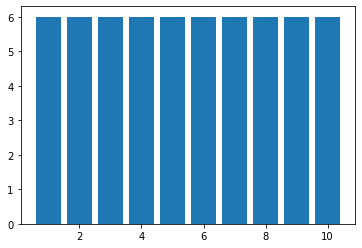

In [26]:
plt.bar(list(range(1, 11)), 
        list(top_ten_fair_combos['count']))
plt.show()

In [27]:
top_ten_unfair_combos = unfair_combos[ : 10]
top_ten_unfair_combos

count
0 1 2 3 4       
6 6 1 3 4     51
        5     46
      2 4     46
      4 5     42
      6 4     42
      5 2     41
      2 2     40
      6 3     39
      3 3     38
        1     37

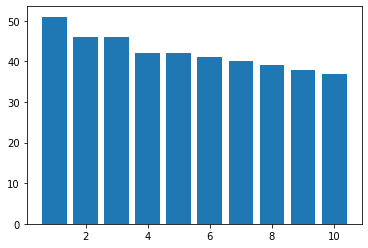

In [28]:
plt.bar(list(range(1, 11)), 
        list(top_ten_unfair_combos['count']))
plt.show()

## Scenario 3

In [29]:
# SCENARIO 3: ROMAN ALPHABET

letters = ['A', 
           'B', 
           'C', 
           'D', 
           'E', 
           'F', 
           'G', 
           'H', 
           'I', 
           'J', 
           'K', 
           'L', 
           'M', 
           'N', 
           'O', 
           'P', 
           'Q', 
           'R', 
           'S', 
           'T', 
           'U', 
           'V', 
           'W', 
           'X', 
           'Y', 
           'Z']

alphabet_die1 = Die(letters)

alphabet_die1.change_weight('A', 8.4966)
alphabet_die1.change_weight('B', 2.0720)
alphabet_die1.change_weight('C', 4.5388)
alphabet_die1.change_weight('D', 3.3844)
alphabet_die1.change_weight('E', 11.1607)
alphabet_die1.change_weight('F', 1.8121)
alphabet_die1.change_weight('G', 2.4705)
alphabet_die1.change_weight('H', 8.4966)
alphabet_die1.change_weight('I', 7.5448)
alphabet_die1.change_weight('J', 0.1965)
alphabet_die1.change_weight('K', 1.1016)
alphabet_die1.change_weight('L', 5.4893)
alphabet_die1.change_weight('M', 3.0129)
alphabet_die1.change_weight('N', 6.6544)
alphabet_die1.change_weight('O', 7.1635)
alphabet_die1.change_weight('P', 3.1671)
alphabet_die1.change_weight('Q', 0.1962)
alphabet_die1.change_weight('R', 7.5809)
alphabet_die1.change_weight('S', 5.7351)
alphabet_die1.change_weight('T', 6.9509)
alphabet_die1.change_weight('U', 3.6308)
alphabet_die1.change_weight('V', 1.0074)
alphabet_die1.change_weight('W', 1.2899)
alphabet_die1.change_weight('X', 0.2902)
alphabet_die1.change_weight('Y', 1.7779)
alphabet_die1.change_weight('Z', 0.2722)

alphabet_die2 = alphabet_die1
alphabet_die3 = alphabet_die1
alphabet_die4 = alphabet_die1
alphabet_die5 = alphabet_die1

In [30]:
alphabet_dice_list = [alphabet_die1, alphabet_die2, alphabet_die3, alphabet_die4, alphabet_die5]

alphabet_dice_game = Game(alphabet_dice_list)

In [31]:
alphabet_dice_game.play(1000)

In [32]:
alphabet_dice_game_outcomes = alphabet_dice_game.show()

In [33]:
# 10 samples of 10 rolls
# Checking manually to see if any rolls in our samples result in a 5 letter word (with characters already in order)

In [34]:
alphabet_outcomes_sample1 = alphabet_dice_game_outcomes.sample(10)
alphabet_outcomes_sample1

,0,1,2,3,4
Roll Number,,,,,
775,S,E,H,S,T
695,Y,S,C,P,O
914,S,A,Y,E,N
247,N,H,E,P,E
20,O,P,O,I,T
316,O,T,C,M,L
401,G,C,N,S,D
219,E,R,C,R,A
334,I,M,K,N,M


In [35]:
# sample 1 resulted in NO words

In [36]:
alphabet_outcomes_sample2 = alphabet_dice_game_outcomes.sample(10)
alphabet_outcomes_sample2

,0,1,2,3,4
Roll Number,,,,,
48,U,K,N,T,M
19,E,C,L,D,S
330,T,E,O,E,K
336,T,E,H,P,L
533,R,O,D,C,G
806,E,O,E,R,M
150,L,A,W,A,A
355,P,A,H,A,E
80,E,U,U,T,N


In [37]:
# sample 2 resulted in NO words

In [38]:
alphabet_outcomes_sample3 = alphabet_dice_game_outcomes.sample(10)
alphabet_outcomes_sample3

,0,1,2,3,4
Roll Number,,,,,
402,E,T,F,H,M
828,E,P,H,N,N
21,I,T,F,R,S
865,I,P,E,T,S
87,L,R,C,B,E
14,G,G,N,O,L
346,R,L,E,C,H
515,I,I,F,I,R
975,Y,I,O,S,D


In [39]:
# sample 3 resulted in NO words

In [40]:
alphabet_outcomes_sample4 = alphabet_dice_game_outcomes.sample(10)
alphabet_outcomes_sample4

,0,1,2,3,4
Roll Number,,,,,
412,H,E,U,A,R
914,S,A,Y,E,N
489,E,F,E,U,I
569,M,U,T,O,P
797,C,P,F,U,O
261,L,H,R,F,L
173,T,I,C,H,L
988,T,N,T,A,D
813,N,E,H,E,I


In [41]:
# sample 4 resulted in NO words

In [42]:
alphabet_outcomes_sample5 = alphabet_dice_game_outcomes.sample(10)
alphabet_outcomes_sample5

,0,1,2,3,4
Roll Number,,,,,
176,H,S,C,F,L
974,C,C,C,H,A
583,N,I,E,F,N
45,H,M,R,A,H
695,Y,S,C,P,O
755,T,D,G,L,T
698,T,C,P,L,A
151,L,A,L,A,L
942,R,I,U,O,I


In [43]:
# sample 5 resulted in NO words

In [44]:
alphabet_outcomes_sample6 = alphabet_dice_game_outcomes.sample(10)
alphabet_outcomes_sample6

,0,1,2,3,4
Roll Number,,,,,
496,D,O,T,C,I
371,E,I,P,T,O
354,U,C,D,A,H
956,S,I,N,N,N
357,P,A,T,S,E
822,T,A,L,G,E
160,C,C,L,E,C
478,N,U,I,O,E
97,H,S,Y,T,T


In [45]:
# sample 6 resulted in NO words

In [46]:
alphabet_outcomes_sample7 = alphabet_dice_game_outcomes.sample(10)
alphabet_outcomes_sample7

,0,1,2,3,4
Roll Number,,,,,
894,V,E,R,N,I
296,S,G,U,E,T
792,C,A,T,P,R
562,S,R,N,W,E
909,E,D,N,H,L
283,H,P,G,B,E
603,E,A,T,P,C
164,U,N,A,O,L
237,T,V,I,E,T


In [47]:
# sample 7 resulted in NO words

In [48]:
alphabet_outcomes_sample8 = alphabet_dice_game_outcomes.sample(10)
alphabet_outcomes_sample8

,0,1,2,3,4
Roll Number,,,,,
443,L,G,U,R,E
228,H,E,E,U,F
548,A,L,E,E,S
737,L,D,P,E,S
505,S,D,H,G,E
515,I,I,F,I,R
450,H,H,B,O,S
356,Y,E,R,T,V
826,M,L,T,E,R


In [49]:
# sample 8 resulted in NO words

In [50]:
alphabet_outcomes_sample9 = alphabet_dice_game_outcomes.sample(10)
alphabet_outcomes_sample9

,0,1,2,3,4
Roll Number,,,,,
801,E,T,I,P,G
569,M,U,T,O,P
472,H,H,H,L,E
655,N,T,P,H,E
141,S,H,T,H,T
815,L,O,A,Y,A
699,T,Y,H,C,I
741,Y,W,H,P,E
805,N,R,A,K,D


In [51]:
# sample 9 resulted in NO words

In [52]:
alphabet_outcomes_sample10 = alphabet_dice_game_outcomes.sample(10)
alphabet_outcomes_sample10

,0,1,2,3,4
Roll Number,,,,,
452,A,L,L,E,S
815,L,O,A,Y,A
916,H,L,C,V,E
874,I,O,L,T,L
128,A,D,U,H,E
262,H,G,R,A,S
890,C,H,A,C,I
568,R,O,N,G,C
551,A,T,E,O,S


In [ ]:
# sample 10 resulted in NO words (alles is German and doesn't count!)

In [53]:
# all 10 samples resulted in 0 words total

# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [54]:
!ls -lRF -o

total 432
-rw-r--r--  1 rjcubarrubia    1069 Nov 22 16:45 LICENSE
-rw-r--r--  1 rjcubarrubia      86 Nov 22 16:45 README.md
-rw-r--r--  1 rjcubarrubia  111492 Nov 30 14:30 final-project-submission.ipynb
-rw-r--r--  1 rjcubarrubia   90390 Nov 30 13:45 montecarlo_demo.ipynb
drwxr-xr-x  9 rjcubarrubia     288 Nov 30 14:02 montecarlosim/
-rw-r--r--  1 rjcubarrubia     400 Nov 25 13:21 setup.py

./montecarlosim:
total 48
-rw-r--r--  1 rjcubarrubia    91 Nov 25 13:03 __init__.py
drwxr-xr-x  4 rjcubarrubia   128 Nov 30 13:53 __pycache__/
-rw-r--r--@ 1 rjcubarrubia   959 Nov 30 14:02 montecarlo_test_results.txt
-rw-r--r--@ 1 rjcubarrubia  6607 Nov 30 14:02 montecarlo_tests.py
-rw-r--r--@ 1 rjcubarrubia  6945 Nov 30 13:53 montecarlosim.py

./montecarlosim/__pycache__:
total 24
-rw-r--r--  1 rjcubarrubia   281 Nov 25 13:24 __init__.cpython-39.pyc
-rw-r--r--  1 rjcubarrubia  7045 Nov 30 13:53 montecarlosim.cpython-39.pyc


# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [55]:
!pip install -e .

Obtaining file:///Users/rjcubarrubia/Documents/UVA_MSDS/UVA_DS5100/montecarlosim
  Preparing metadata (setup.py) ... done
  Running setup.py develop for montecarlosim
